<a href="https://colab.research.google.com/github/krisanndesiderio/SYSTEM-TRON/blob/main/COVID19_Case_Surveillance_Public_Use_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID19-case Surveillance Public Use Data

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
from google.colab import data_table

In [2]:
url = 'https://raw.githubusercontent.com/krisanndesiderio/SYSTEM-TRON/main/COVID-19_Case_Surveillance_Public_Use_Data.csv'

In [3]:
dataset = pd.read_csv(url)

In [4]:
dataset.head(600)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,10/11/2020,10/11/2020,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,14/11/2020,10/11/2020,10/11/2020,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,19/11/2020,10/11/2020,09/11/2020,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,14/11/2020,10/11/2020,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,13/11/2020,10/11/2020,10/11/2020,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
594,18/11/2020,NaN,16/11/2020,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,Missing,Missing,Missing,Missing
595,21/10/2020,NaN,11/08/2020,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,Missing,No,Missing
596,07/08/2020,NaN,25/07/2020,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,Missing,Unknown,Missing
597,24/06/2020,NaN,25/04/2020,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Missing


Data Cleaning

Checking Nulls



In [5]:
dataset.isnull().sum()

cdc_report_dt                      0
pos_spec_dt                      200
onset_dt                         266
current_status                     0
sex                                0
age_group                          0
Race and ethnicity (combined)      0
hosp_yn                            0
icu_yn                             0
death_yn                           0
medcond_yn                         0
dtype: int64

Removing column

In [6]:
dataset.drop(['Race and ethnicity (combined)'], axis = 1, inplace=True)
dataset.head(600)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn
0,10/11/2020,10/11/2020,NaN,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No
1,14/11/2020,10/11/2020,10/11/2020,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No
2,19/11/2020,10/11/2020,09/11/2020,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No
3,14/11/2020,10/11/2020,NaN,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing
4,13/11/2020,10/11/2020,10/11/2020,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
594,18/11/2020,NaN,16/11/2020,Laboratory-confirmed case,Male,20 - 29 Years,Missing,Missing,Missing,Missing
595,21/10/2020,NaN,11/08/2020,Laboratory-confirmed case,Male,20 - 29 Years,No,Missing,No,Missing
596,07/08/2020,NaN,25/07/2020,Laboratory-confirmed case,Male,20 - 29 Years,No,Missing,Unknown,Missing
597,24/06/2020,NaN,25/04/2020,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,Missing


Data Visualization

Scatter Graph

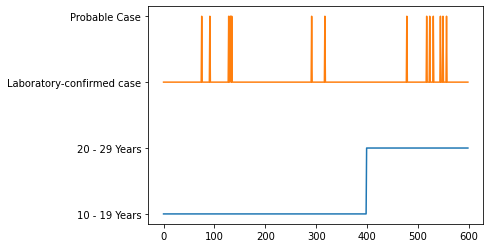

In [7]:
plt.plot(dataset.age_group)
plt.plot(dataset.current_status)



Scatter Plot

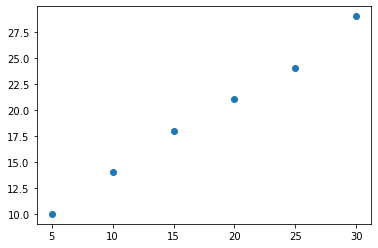

In [8]:
import matplotlib.pyplot as plt


x=[5,10,15,20,25,30]
y=[10,14,18,21,24,29]

plt.scatter(x,y)

Line Graph

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


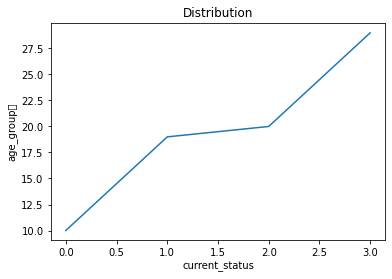

In [10]:
import matplotlib.pyplot as plt

v = [10,19,20,29]
plt.plot(v)
plt.ylabel("age_group	")
plt.xlabel("current_status")
plt.title('Distribution')
plt.show()